# Quiz 2

## 1
Min Distance classifier on 3 Gaussian Classes. Modify your KNN program from quiz 1
with 3 classes to create 50 random points for each class: red, blue, and yellow from a 2D Gaussian
distribution (see Gaussian Data.ipynb) with means: (20, 30), (40, 40), (50, 40) and (s_x, s_y) of
(3, 10), (10, 10), (15, 15), for red, blue, and yellow, respectively. Use 70% of the dataset as
training data and 30% as testing data.

- 5 pts. Plot the 3 classes using the training data.
- 5 pts. Using KNN with K = 5, report the total accuracy of the testing data.
- Code your own minimum distance classifier:
- 5 pts. Report the training data cluster mean for each class of red, blue, and yellow.
- 5 pts. Report the total accuracy of the testing data using this classifier.
- 10 pts. Compare both your results with using sklearn’s NearestCentroid. Here’s
some sample code showing how it is used:
```python
from sklearn.neighbors import NearestCentroid
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = NearestCentroid()
clf.fit(X, y)
print(clf.predict([[-0.8, -1]])) #To test a point
print(clf.centroids_) #To print the centroids
```

In [1]:
from tools.SuperviseLearning.KNN import KNN

In [2]:
knn = KNN.from_2d_normal_dist([(20, 30), (40, 40), (50,40)], [(3, 10), (10, 10), (15, 15)], 50)

In [3]:
X = knn.features[["feature_x", "feature_y"]].to_numpy()
X

array([[19.92473411, 26.52941654],
       [20.8336794 , 36.30712447],
       [21.82720931, 31.21858662],
       [16.43671156, 41.47732542],
       [23.40481721, 26.00302913],
       [21.07963706, 46.35317238],
       [21.32749565, 43.58258517],
       [20.06966887, 31.57474114],
       [17.83600561, 11.92111425],
       [22.61644332, 24.48502122],
       [18.34471368, 23.64434292],
       [13.47771684, 29.23472   ],
       [18.04456518, 22.24823975],
       [18.40347609, 10.07557311],
       [23.49599667, 26.18046094],
       [18.99104828, 21.75178192],
       [19.91076529, 14.55801516],
       [20.65135274, 31.92508057],
       [22.23310085, 41.4078731 ],
       [14.95028964, 19.76149038],
       [21.38610027, 17.89526925],
       [17.16967589, 29.80560362],
       [16.22754278, 28.70740298],
       [18.92827398, 14.49992143],
       [18.71174651, 42.12590596],
       [16.57497965, 30.56628251],
       [21.66276512, 36.0455841 ],
       [22.00555722, 26.13790714],
       [15.74572738,

In [4]:
Y = knn.label.to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- Plot the 3 classes using the training data.

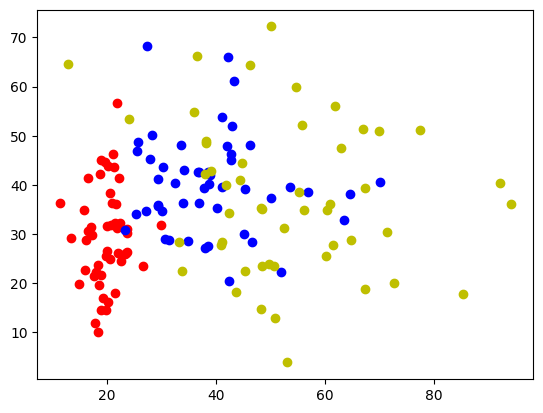

In [5]:
import matplotlib.pyplot as plt

point_per_class = 50
plt.scatter(X[:point_per_class, 0], X[:point_per_class, 1], color='r', label='red')
plt.scatter(X[point_per_class:point_per_class*2, 0], X[point_per_class:point_per_class*2, 1], color='b', label='blue')
plt.scatter(X[point_per_class*2:point_per_class*3, 0], X[point_per_class*2:point_per_class*3, 1], color='y', label='yellow')

In [6]:
train, test = knn.split_train_test(.3)

In [7]:
train.shape, test.shape

((105, 3), (45, 3))

In [8]:
train

,feature_x,feature_y,label
50,23.353549,30.818188,1
2,21.827209,31.218587,0
83,51.933331,22.202048,1
121,39.108846,42.779294,2
135,56.154236,34.824008,2
...,...,...,...
118,33.791008,22.425494,2
103,49.735232,23.974108,2
56,42.261714,65.996853,1
13,18.403476,10.075573,0


In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train[["feature_x", "feature_y"]], train["label"])

knn.predict(test[["feature_x", "feature_y"]])

knn.score(test[["feature_x", "feature_y"]], test["label"])

0.6888888888888889

# 2
4 hrs. Code Naive Bayes from Scratch. Write a program to read the Iris dataset, split into 2 parts:
training and testing just like it was done in the example. Then write your own code to:

Import the Iris dataset.

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

df.iloc[1,:-1].to_dict()

{'sepal length (cm)': 4.9,
 'sepal width (cm)': 3.0,
 'petal length (cm)': 1.4,
 'petal width (cm)': 0.2}

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=.3)

Use My `NaiveBayes` class to train the model.

In [13]:
from tools.SuperviseLearning.NaiveBayes import NaiveBayes

nb = NaiveBayes(train, "target")

### Class Detail
```python

StatDeatils = TypedDict("StatDeatils", {"mean": np.ndarray, "std": np.ndarray, "prob": float})

class NaiveBayes(SuperviseLearning):
    def __init__(self, df, label):
        super().__init__(df, label)
        self.stats: Dict[str, StatDeatils] = {k: {"mean": None, "std": None, "prob": None} for k in self.label.unique()}
        
        self.find_stats()

    
    def find_stats(self):
        '''
        find mean and std for each class
        '''
        for k in self.stats.keys():
            self.stats[k]["mean"] = self.features[self.label == k].mean()
            self.stats[k]["std"] = self.features[self.label == k].std()
            self.stats[k]["prob"] = len(self.features[self.label == k])/len(self.features)

    
    def __gaussian_pdf(self, x, mean, sd):
        '''
        Gaussian probability density function
        '''
        return 1/(np.sqrt(2*np.pi*(sd**2))) * np.exp(-((x - mean)**2)/(2*(sd**2)))

    def predict(self, x: TypedDict):
        if x.keys() != self.stats[0].keys():
            raise ValueError("input must have the same keys as features")
        cls_prop = {}
        for cls_name, cls_stats in self.stats.items():
            prob = 1
            for f, v in x.items():
                prob *= self.__gaussian_pdf(v, cls_stats["mean"][f], cls_stats["std"][f])
            prob *= cls_stats["prob"]
            cls_prop[cls_name] = prob

        return max(cls_prop, key=cls_prop.get)
```

5 pts. Find the mean and standard deviation for each of the 4 features of each of the 3 classes from the
training data. μ_ik and σ_ik for i = 1..4, k = 1..3. You will get pdfs P(x_i | c_k) for each class using the
Gaussian distribution equation with μ_ik and σ_ik for i = 1..4, k = 1..3. This gets you pdfs: P(x_1, x_2,
x_3, x_4 | c_1), P(x_1, x_2, x_3, x_4 | c_2), P(x_1, x_2, x_3, x_4 | c_3).

From m class method `find_stat` it already calculate statistic for every class.

In [14]:
nb.stats

{1: {'mean': sepal length (cm)    5.881818
  sepal width (cm)     2.790909
  petal length (cm)    4.260606
  petal width (cm)     1.345455
  dtype: float64,
  'std': sepal length (cm)    0.507724
  sepal width (cm)     0.311612
  petal length (cm)    0.458898
  petal width (cm)     0.192177
  dtype: float64,
  'prob': 0.3142857142857143},
 2: {'mean': sepal length (cm)    6.592105
  sepal width (cm)     2.952632
  petal length (cm)    5.560526
  petal width (cm)     2.031579
  dtype: float64,
  'std': sepal length (cm)    0.636027
  sepal width (cm)     0.320251
  petal length (cm)    0.583808
  petal width (cm)     0.286739
  dtype: float64,
  'prob': 0.3619047619047619},
 0: {'mean': sepal length (cm)    4.944118
  sepal width (cm)     3.376471
  petal length (cm)    1.482353
  petal width (cm)     0.264706
  dtype: float64,
  'std': sepal length (cm)    0.361136
  sepal width (cm)     0.396239
  petal length (cm)    0.178327
  petal width (cm)     0.115161
  dtype: float64,
  'prob'

5 pts. Find the P(c_k) by counting the percent frequency of each class in your training data. Now we have
P(c_k | x_1, x_2, x_3, x_4) ∝ P(x_1, x_2, x_3, x_4 | c_k) * P(c_k).

I already calculate the probability of each class in `find_stat` method.

In [15]:
for prob in nb.stats.values():
    print(prob["prob"])

0.3142857142857143
0.3619047619047619
0.3238095238095238


5 pts. Then for each (x_1, x_2, x_3, x_4) in your test data: find the class k of 1, 2, or 3 for which P(c_k |
x_1, x_2, x_3, x_4) is maximum, put that k into array my_predicted_labels

In [16]:
my_predicted_labels = []
for i in range(test.shape[0]):
    my_predicted_labels.append(nb.predict(test.iloc[i,:-1].to_dict()))

5 pts. Calculate and print the accuracy score from your implementation of Naive Bayes from scratch.

In [17]:
accuracy = sum(my_predicted_labels == test["target"]) / test.shape[0]
accuracy

1.0

5 pts. Use sklearn's GaussianNB classifier to report the accuracy score. Compare your result in (d) to
sklearn’s.

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
gnb = GaussianNB()

gnb.fit(train.iloc[:,:-1], train["target"])

gnb.predict(test.iloc[:,:-1])

gnb.score(test.iloc[:,:-1], test["target"])

1.0

# 3
1 hr. Try the digits datasets. Change the “Naive Bayes and KNN Iris and Cancer.ipynb” program
to allow the user to also select the digits dataset by entering “digits”, in addition to “iris” and
“cancer”. Present the output results using Sklearn for:

In [20]:
from typing import Literal, List, Set

possible_datasets: Set[Literal['iris', 'cancer', 'digit']] = {'iris', 'cancer', 'digit'}
dataset_type : Literal['iris', 'cancer', 'digit'] = 'none'
while dataset_type not in possible_datasets: #problem 3 add 'digits'
  dataset_type = input('Enter iris for the Iris dataset and cancer for the Breast Cancer dataset ')
  if dataset_type not in possible_datasets:
    print("Invalid response: '%s'. Please try again." % dataset_type)

In [21]:
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
if dataset_type == "iris":
  the_data = load_iris() #get the data from sklearn
elif dataset_type == 'digit':
  the_data = load_digits()
else:
  the_data = load_breast_cancer() #get the data from sklearn

In [22]:
label_names = the_data['target_names']
feature_names = the_data['feature_names']
all_labels = the_data['target'] #class label
all_features = the_data['data'] #dictionaries in python

In [23]:
from sklearn.model_selection import train_test_split
# Spliting our dataset into 2 parts for training and testing
training_features, testing_features, training_labels, testing_labels = train_test_split(all_features,all_labels,test_size=0.2,random_state=0)
print("\nTraining features: \n", training_features)
print("\nTraining Labels: \n", training_labels)
print("\nTesting Labels: \n", testing_labels)


Training features: 
 [[ 0.  0.  0. ... 16. 16.  6.]
 [ 0.  3. 12. ... 16.  2.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  6. ... 11.  0.  0.]]

Training Labels: 
 [6 5 3 ... 7 7 8]

Testing Labels: 
 [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8

In [24]:
# Training our Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() #classifier is now an object of the Gaussian Naive Bayes class
model = classifier.fit(training_features,training_labels)
predicted_labels = model.predict(testing_features) #use the model obtained in previous step to predict labels for testing features

In [25]:
from sklearn.metrics import accuracy_score
# Calculating the % Accuracy of the prediction. For Iris dataset random_state = 0 gives 97%, random_state 40 gives 100%, random_state 5 gives 90%.
accuracy_percent = 100*accuracy_score(testing_labels,predicted_labels)
print("Prediction Accuracy : %5.2f%%" % accuracy_percent) #%% escapes the formatting % to print '%'

Prediction Accuracy : 82.50%


In [26]:
from sklearn.neighbors import KNeighborsClassifier
neighbor_size = []
errors_list = []
for k in range (2, 20):
  classifier = KNeighborsClassifier(n_neighbors = k)
  model = classifier.fit(training_features,training_labels)  # or can also use:   predicted_labels = classifier.fit(train_features,train_labels)
  predicted_labels = model.predict(testing_features) #use the model obtained in previous step to predict labels for testing features
  accuracy_percent = 100*accuracy_score(testing_labels,predicted_labels)
  # Calculating the % Accuracy of the prediction.
  print("Prediction Accuracy for k = %2d : %5.2f%%" % (k, accuracy_percent)) #%% escapes the formatting % to print '%'
  neighbor_size.append(k)
  errors_list.append(100-accuracy_percent)

print (" K = ", neighbor_size, "\n", "Errors = ", errors_list)

Prediction Accuracy for k =  2 : 98.06%
Prediction Accuracy for k =  3 : 98.33%
Prediction Accuracy for k =  4 : 97.50%
Prediction Accuracy for k =  5 : 97.50%
Prediction Accuracy for k =  6 : 97.22%
Prediction Accuracy for k =  7 : 97.50%
Prediction Accuracy for k =  8 : 97.50%
Prediction Accuracy for k =  9 : 97.50%
Prediction Accuracy for k = 10 : 97.22%
Prediction Accuracy for k = 11 : 97.22%
Prediction Accuracy for k = 12 : 97.22%
Prediction Accuracy for k = 13 : 97.22%
Prediction Accuracy for k = 14 : 96.94%
Prediction Accuracy for k = 15 : 96.94%
Prediction Accuracy for k = 16 : 96.94%
Prediction Accuracy for k = 17 : 96.67%
Prediction Accuracy for k = 18 : 96.67%
Prediction Accuracy for k = 19 : 96.11%
 K =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 
 Errors =  [1.9444444444444429, 1.6666666666666714, 2.5, 2.5, 2.7777777777777857, 2.5, 2.5, 2.5, 2.7777777777777857, 2.7777777777777857, 2.7777777777777857, 2.7777777777777857, 3.055555555555557, 3.0555555555

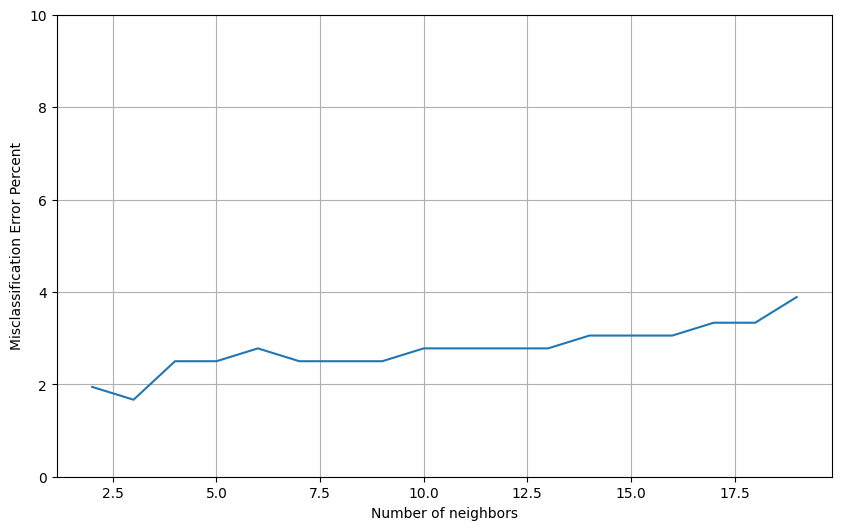

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6 ))
plt.plot(neighbor_size, errors_list) #x list and y list
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error Percent')
plt.ylim((0,10))
plt.grid(True)
plt.show()

so the best k is `3` mesure by accuracy.

# 4
10 pts. 0.5 hr. Normalize data option. Add an option to “Naive Bayes and KNN Iris and Cancer.ipynb” to ask the user whether to normalize the dataset by converting each feature into a Z-distribution by making mean = 0, and standard deviation = 1. For this problem, compare the accuracy results for the breast cancer dataset on the sklearn's KNN classifier using normalized vs. unnormalized data.

## Copy the code from the previous quiz and modify it to add the option to normalize the data.

In [35]:
from typing import Literal, List, Set

possible_datasets: Set[Literal['iris', 'cancer', 'digit']] = {'iris', 'cancer', 'digit'}
dataset_type : Literal['iris', 'cancer', 'digit'] = 'none'
while dataset_type not in possible_datasets: #problem 3 add 'digits'
  dataset_type = input('Enter iris for the Iris dataset and cancer for the Breast Cancer dataset ')
  if dataset_type not in possible_datasets:
    print("Invalid response: '%s'. Please try again." % dataset_type)

In [36]:
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
if dataset_type == "iris":
  the_data = load_iris() #get the data from sklearn
elif dataset_type == 'digit':
  the_data = load_digits()
else:
  the_data = load_breast_cancer() #get the data from sklearn

Add normalize option

In [37]:
while True:
  is_norm = input('Do you want to normalize the data? (yes/no) ')
  if is_norm == 'yes':
    # norm as mean = 0 and standard deviation = 1
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(with_mean=True, with_std=True)
    scaler.fit(all_features)
    break
  elif is_norm == 'no':
    break
  else:
    print("Invalid response: '%s'. Please try again." % is_norm)

In [38]:
label_names = the_data['target_names']
feature_names = the_data['feature_names']
all_labels = the_data['target'] #class label
all_features = the_data['data'] #dictionaries in python

In [39]:
from sklearn.model_selection import train_test_split
# Spliting our dataset into 2 parts for training and testing
training_features, testing_features, training_labels, testing_labels = train_test_split(all_features,all_labels,test_size=0.2,random_state=0)
print("\nTraining features: \n", training_features)
print("\nTraining Labels: \n", training_labels)
print("\nTesting Labels: \n", testing_labels)


Training features: 
 [[1.005e+01 1.753e+01 6.441e+01 ... 6.499e-02 2.894e-01 7.664e-02]
 [1.080e+01 2.198e+01 6.879e+01 ... 7.485e-02 2.965e-01 7.662e-02]
 [1.614e+01 1.486e+01 1.043e+02 ... 1.129e-01 2.778e-01 7.012e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]

Training Labels: 
 [1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0
 0 0 0 1 1 1 1 0 0 1 1 1 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
neighbor_size = []
errors_list = []
for k in range (2, 20):
  classifier = KNeighborsClassifier(n_neighbors = k)
  model = classifier.fit(training_features,training_labels)  # or can also use:   predicted_labels = classifier.fit(train_features,train_labels)
  predicted_labels = model.predict(testing_features) #use the model obtained in previous step to predict labels for testing features
  accuracy_percent = 100*accuracy_score(testing_labels,predicted_labels)
  # Calculating the % Accuracy of the prediction.
  print("Prediction Accuracy for k = %2d : %5.2f%%" % (k, accuracy_percent)) #%% escapes the formatting % to print '%'
  neighbor_size.append(k)
  errors_list.append(100-accuracy_percent)

print (" K = ", neighbor_size, "\n", "Errors = ", errors_list)

Prediction Accuracy for k =  2 : 89.47%
Prediction Accuracy for k =  3 : 91.23%
Prediction Accuracy for k =  4 : 92.11%
Prediction Accuracy for k =  5 : 93.86%
Prediction Accuracy for k =  6 : 93.86%
Prediction Accuracy for k =  7 : 94.74%
Prediction Accuracy for k =  8 : 94.74%
Prediction Accuracy for k =  9 : 96.49%
Prediction Accuracy for k = 10 : 94.74%
Prediction Accuracy for k = 11 : 96.49%
Prediction Accuracy for k = 12 : 96.49%
Prediction Accuracy for k = 13 : 96.49%
Prediction Accuracy for k = 14 : 96.49%
Prediction Accuracy for k = 15 : 96.49%
Prediction Accuracy for k = 16 : 96.49%
Prediction Accuracy for k = 17 : 96.49%
Prediction Accuracy for k = 18 : 96.49%
Prediction Accuracy for k = 19 : 96.49%
 K =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 
 Errors =  [10.526315789473685, 8.771929824561411, 7.89473684210526, 6.1403508771929864, 6.1403508771929864, 5.26315789473685, 5.26315789473685, 3.5087719298245617, 5.26315789473685, 3.5087719298245617, 3.508

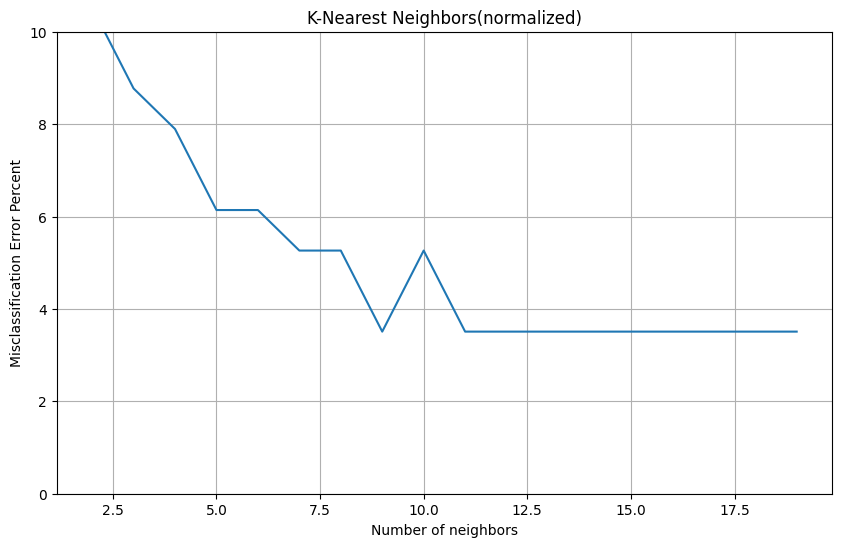

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6 ))
plt.plot(neighbor_size, errors_list) #x list and y list
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error Percent')
plt.title('K-Nearest Neighbors(normalized)')
plt.ylim((0,10))
plt.grid(True)
plt.show()

Vs unnormalized data

In [42]:
from typing import Literal, List, Set

possible_datasets: Set[Literal['iris', 'cancer', 'digit']] = {'iris', 'cancer', 'digit'}
dataset_type : Literal['iris', 'cancer', 'digit'] = 'none'
while dataset_type not in possible_datasets: #problem 3 add 'digits'
  dataset_type = input('Enter iris for the Iris dataset and cancer for the Breast Cancer dataset ')
  if dataset_type not in possible_datasets:
    print("Invalid response: '%s'. Please try again." % dataset_type)

In [43]:
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
if dataset_type == "iris":
  the_data = load_iris() #get the data from sklearn
elif dataset_type == 'digit':
  the_data = load_digits()
else:
  the_data = load_breast_cancer() #get the data from sklearn

In [44]:
while True:
  is_norm = input('Do you want to normalize the data? (yes/no) ')
  if is_norm == 'yes':
    mean = 0
    std = 1
    the_data = (the_data - mean) / std
    break
  elif is_norm == 'no':
    break
  else:
    print("Invalid response: '%s'. Please try again." % is_norm)

In [45]:
label_names = the_data['target_names']
feature_names = the_data['feature_names']
all_labels = the_data['target'] #class label
all_features = the_data['data'] #dictionaries in python

In [46]:
from sklearn.model_selection import train_test_split
# Spliting our dataset into 2 parts for training and testing
training_features, testing_features, training_labels, testing_labels = train_test_split(all_features,all_labels,test_size=0.2,random_state=0)
print("\nTraining features: \n", training_features)
print("\nTraining Labels: \n", training_labels)
print("\nTesting Labels: \n", testing_labels)


Training features: 
 [[1.005e+01 1.753e+01 6.441e+01 ... 6.499e-02 2.894e-01 7.664e-02]
 [1.080e+01 2.198e+01 6.879e+01 ... 7.485e-02 2.965e-01 7.662e-02]
 [1.614e+01 1.486e+01 1.043e+02 ... 1.129e-01 2.778e-01 7.012e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]

Training Labels: 
 [1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0
 0 0 0 1 1 1 1 0 0 1 1 1 

In [47]:
from sklearn.neighbors import KNeighborsClassifier
neighbor_size = []
errors_list = []
for k in range (2, 20):
  classifier = KNeighborsClassifier(n_neighbors = k)
  model = classifier.fit(training_features,training_labels)  # or can also use:   predicted_labels = classifier.fit(train_features,train_labels)
  predicted_labels = model.predict(testing_features) #use the model obtained in previous step to predict labels for testing features
  accuracy_percent = 100*accuracy_score(testing_labels,predicted_labels)
  # Calculating the % Accuracy of the prediction.
  print("Prediction Accuracy for k = %2d : %5.2f%%" % (k, accuracy_percent)) #%% escapes the formatting % to print '%'
  neighbor_size.append(k)
  errors_list.append(100-accuracy_percent)

print (" K = ", neighbor_size, "\n", "Errors = ", errors_list)

Prediction Accuracy for k =  2 : 89.47%
Prediction Accuracy for k =  3 : 91.23%
Prediction Accuracy for k =  4 : 92.11%
Prediction Accuracy for k =  5 : 93.86%
Prediction Accuracy for k =  6 : 93.86%
Prediction Accuracy for k =  7 : 94.74%
Prediction Accuracy for k =  8 : 94.74%
Prediction Accuracy for k =  9 : 96.49%
Prediction Accuracy for k = 10 : 94.74%
Prediction Accuracy for k = 11 : 96.49%
Prediction Accuracy for k = 12 : 96.49%
Prediction Accuracy for k = 13 : 96.49%
Prediction Accuracy for k = 14 : 96.49%
Prediction Accuracy for k = 15 : 96.49%
Prediction Accuracy for k = 16 : 96.49%
Prediction Accuracy for k = 17 : 96.49%
Prediction Accuracy for k = 18 : 96.49%
Prediction Accuracy for k = 19 : 96.49%
 K =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 
 Errors =  [10.526315789473685, 8.771929824561411, 7.89473684210526, 6.1403508771929864, 6.1403508771929864, 5.26315789473685, 5.26315789473685, 3.5087719298245617, 5.26315789473685, 3.5087719298245617, 3.508

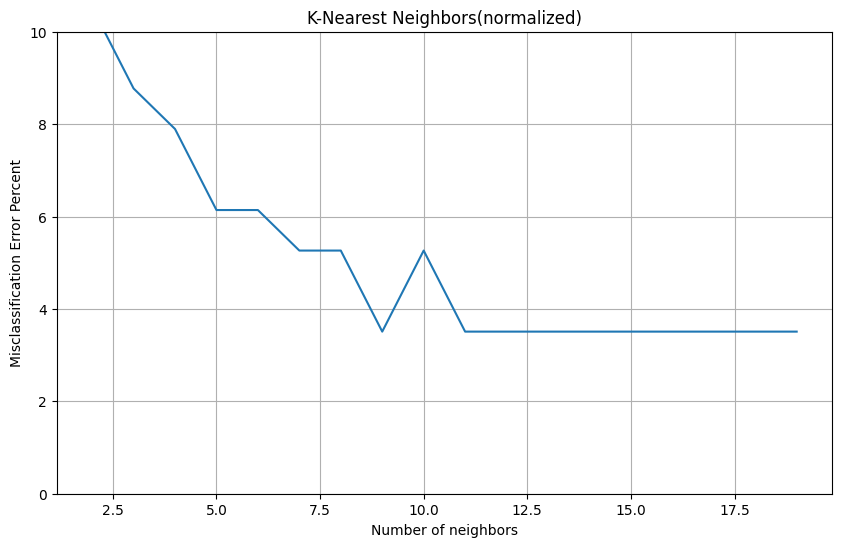

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6 ))
plt.plot(neighbor_size, errors_list) #x list and y list
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error Percent')
plt.title('K-Nearest Neighbors(normalized)')
plt.ylim((0,10))
plt.grid(True)
plt.show()

If this code is correct. It seem not different when normalize data. But in KNN scale of each feature is important. So it should be different.